# Hierarchical cluster

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('crime_data.csv',)

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data=data.rename(columns={'Unnamed: 0':'states','Murder':'murder','Assault':'assault','UrbanPop':'urbanpop','Rape':'rape'})

In [5]:
data.describe()

,murder,assault,urbanpop,rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
data1=data.iloc[:,1:]

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler= MinMaxScaler()
scaler.fit_transform(data1)

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [9]:
import scipy.cluster.hierarchy as sch

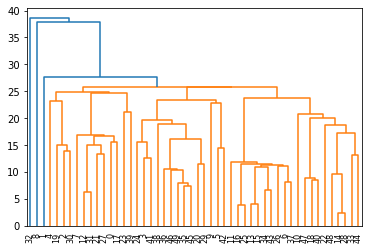

In [10]:
dendogram=sch.dendrogram(sch.linkage(data1,method='single'))

In [11]:
data

,states,murder,assault,urbanpop,rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
h_c=AgglomerativeClustering(n_clusters=4,linkage='average')

In [14]:
y_c=h_c.fit_predict(data1)

In [15]:
clusters=pd.DataFrame(y_c,columns=['clusters'])

In [16]:
clusters.head()

,clusters
0,1
1,1
2,1
3,2
4,1


In [17]:
data['cluster']=clusters

In [18]:
data.head()

,states,murder,assault,urbanpop,rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [19]:
data.insert(loc=1,column='cluster',value=clusters)

ValueError: cannot insert cluster, already exists

In [20]:
data.head()

,states,murder,assault,urbanpop,rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [21]:
data.groupby('cluster').agg('mean')

,murder,assault,urbanpop,rape
cluster,,,,
0,4.270000,87.550000,59.750000,14.390000
1,11.471429,263.500000,69.142857,29.000000
2,8.214286,173.285714,70.642857,22.842857
3,14.200000,336.000000,62.500000,24.000000


In [22]:
data[data['cluster']==0]

,states,murder,assault,urbanpop,rape,cluster
6,Connecticut,3.3,110,77,11.1,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0


In [23]:
data['cluster'].value_counts()

0    20
1    14
2    14
3     2
Name: cluster, dtype: int64

In [24]:
data[data['cluster']==3]

,states,murder,assault,urbanpop,rape,cluster
8,Florida,15.4,335,80,31.9,3
32,North Carolina,13.0,337,45,16.1,3


In [25]:
data[data['cluster']==2]

,states,murder,assault,urbanpop,rape,cluster
3,Arkansas,8.8,190,50,19.5,2
5,Colorado,7.9,204,78,38.7,2
9,Georgia,17.4,211,60,25.8,2
20,Massachusetts,4.4,149,85,16.3,2
24,Missouri,9.0,178,70,28.2,2
29,New Jersey,7.4,159,89,18.8,2
35,Oklahoma,6.6,151,68,20.0,2
36,Oregon,4.9,159,67,29.3,2
38,Rhode Island,3.4,174,87,8.3,2
41,Tennessee,13.2,188,59,26.9,2


In [27]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_score(data1,h_c.fit_predict(data1))

0.49995555523087537